# Scikit-Learn을 활용한 타이타닉 탑승객 생존 예측 Classification

## 데이터 전처리

In [1]:
#1 데이터 불러오기 
import pandas as pd 
data = pd.read_csv('Titanic_dataset.csv')
data.head()

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
# 2. 데이터 확인하기 
data.describe(include='all')

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


In [3]:
#3. 데이터 값 확인 -> 빠진 값이 무엇인지 확인 
data.isnull().sum()

pclass          0
survived        0
name            0
gender          0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [5]:
#4. 사용하지 않을 피쳐 제거 
data.drop(['cabin', 'boat', 'body', 'home.dest', 'name', 'ticket'], axis=1, inplace=True)

In [6]:
data.info()   # 정보 확인 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   gender    1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1308 non-null   float64
 7   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


In [9]:
# 빠진값 다시 확인
data.isnull().sum()

pclass        0
survived      0
gender        0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [10]:
#5. 빠진값 채우기 
data.fare.mean()   # 평균 확인 

33.29547928134557

In [11]:
data.loc[data.fare.isnull(), 'fare'] = data.fare.mean()  # 빠진 값을 평균으로 채워 넣기 
data.isnull().sum()

pclass        0
survived      0
gender        0
age         263
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [12]:
#6. 나이 빈값 채우기 
data.age.mean()

29.8811345124283

In [14]:
data.loc[data.age.isnull(), 'age'] = data.age.mean()
data.isnull().sum()

pclass      0
survived    0
gender      0
age         0
sibsp       0
parch       0
fare        0
embarked    2
dtype: int64

In [16]:
#7. 출항지 빈값 채우기 
data.groupby('embarked').size()

embarked
C    270
Q    123
S    914
dtype: int64

In [17]:
# 최빈값으로 채우기 (가장 많은 것으로)
data.loc[data.embarked.isnull(), 'embarked'] = 'S'
data.isnull().sum()

pclass      0
survived    0
gender      0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

## 시각화 

In [18]:
#8. 시각화
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
data.survived.value_counts(normalize=True)

0    0.618029
1    0.381971
Name: survived, dtype: float64

c:\python\37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of survived')

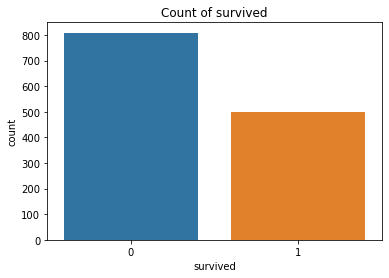

In [22]:
sns.countplot(data.survived)
plt.title('Count of survived')

c:\python\37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relationship between Gender and Survived')

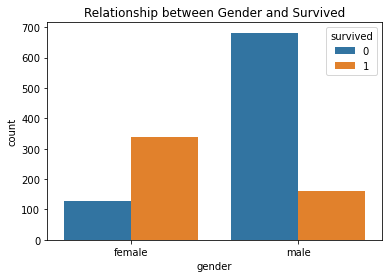

In [23]:
# 8-1 성별에 따른 생존자수 
sns.countplot(data.gender, hue=data.survived)
plt.title('Relationship between Gender and Survived')

여성일 경우 생존할 확률이 남성에 비해 2개 가량 높다

c:\python\37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Relationship between Class and Survived')

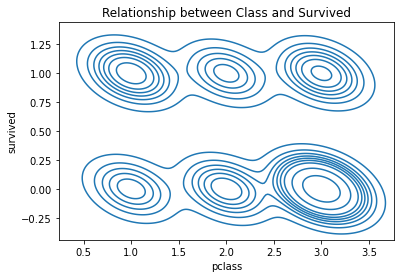

In [25]:
#8-2 선실 등급에 따른 생존 여부 
sns.kdeplot(data.pclass, data.survived)   # 등고선 형태로 표현 
plt.title('Relationship between Class and Survived')

선실등급이 3등급일 때는 생존하지 못하는 사람의 비율이 1등급일 때는 생존하는 사람의 비율이 높다.

In [28]:
#9. 데이터 변환 --> 문자 데이터 코드화
data.loc[data.gender == 'male', 'gender'] = 0
data.loc[data.gender == 'female', 'gender'] = 1

data.loc[data.embarked == 'S', 'embarked'] = 0
data.loc[data.embarked == 'Q', 'embarked'] = 1
data.loc[data.embarked == 'C', 'embarked'] = 2

data.head()

,pclass,survived,gender,age,sibsp,parch,fare,embarked
0,1,1,1,29.0000,0,0,211.3375,0
1,1,1,0,0.9167,1,2,151.5500,0
2,1,0,1,2.0000,1,2,151.5500,0
3,1,0,0,30.0000,1,2,151.5500,0
4,1,0,1,25.0000,1,2,151.5500,0


In [29]:
#10. X/Y 분리 
X = data.drop('survived', axis=1)
Y = data.survived

print(X[:5])
print(Y[:5])

   pclass gender      age  sibsp  parch      fare embarked
0       1      1  29.0000      0      0  211.3375        0
1       1      0   0.9167      1      2  151.5500        0
2       1      1   2.0000      1      2  151.5500        0
3       1      0  30.0000      1      2  151.5500        0
4       1      1  25.0000      1      2  151.5500        0
0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64


In [31]:
#11. 훈련셋/평가셋 분리 
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=109)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1047, 7)
(262, 7)
(1047,)
(262,)


In [32]:
#12. 모델 학습 
from sklearn.linear_model import LogisticRegression

log_classifier = LogisticRegression()
log_classifier.fit(X_train, Y_train)

c:\python\37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
#13. 모델 성능 확인 
from sklearn.metrics import accuracy_score, recall_score, precision_score
y_predict = log_classifier.predict(X_test)
acc = accuracy_score(Y_test, y_predict)       # 정확도 확인 
print('acc(정확도) :', acc)

recall = recall_score(Y_test, y_predict)      # 재현율
print('recall(재현율) :', recall)

precision = precision_score(Y_test, y_predict) # 정밀도 
print('precision(정밀도) :', precision)

acc(정확도) : 0.7633587786259542
recall(재현율) : 0.6633663366336634
precision(정밀도) : 0.7052631578947368


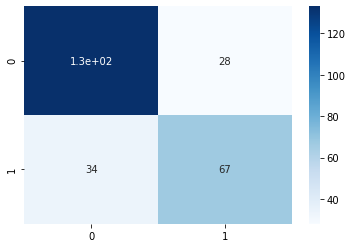

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predict)
sns.heatmap(cm, annot=True, cmap='Blues')